In [12]:
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Project root
PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

# Results directories
RESULTS_DIR = PROJECT_ROOT / "results"
RESULTS_FIGURES = RESULTS_DIR / "figures"
RESULTS_METRICS = RESULTS_DIR / "metrics"

RESULTS_FIGURES.mkdir(parents=True, exist_ok=True)
RESULTS_METRICS.mkdir(parents=True, exist_ok=True)


In [13]:
# Load metrics from Stage 6
metrics_df = pd.read_csv(RESULTS_METRICS / "model_metrics.csv")

# Inspect metrics
metrics_df.head()


,assay,roc_auc,precision,recall,f1_score,best_threshold
0,NR-AR,0.665077,0.400000,0.500000,0.444444,0.12
1,NR-AR-LBD,0.642505,0.666667,0.285714,0.400000,0.23
2,NR-AhR,0.844703,0.263158,0.483871,0.340909,0.14
3,NR-Aromatase,0.756171,0.200000,0.181818,0.190476,0.15
4,NR-ER,0.637566,0.276596,0.270833,0.273684,0.17


C:\Users\Kenjo\AppData\Local\Temp\ipykernel_19728\514764580.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=metrics_df, x="assay", y="roc_auc", palette="viridis")


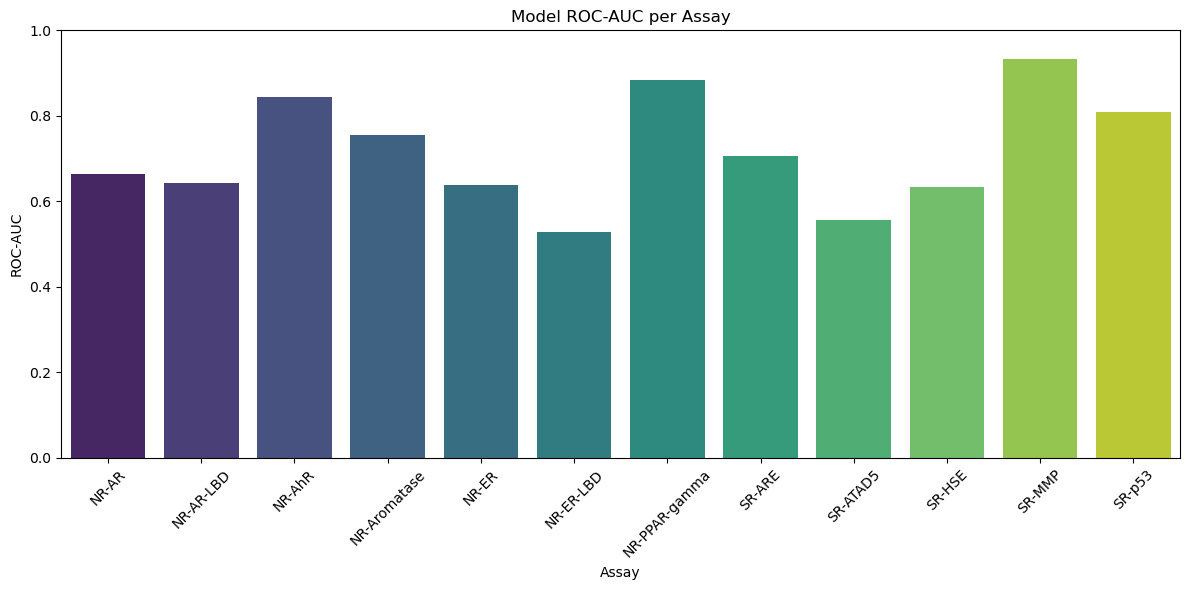

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=metrics_df, x="assay", y="roc_auc", palette="viridis")
plt.xticks(rotation=45)
plt.ylim(0,1)
plt.title("Model ROC-AUC per Assay")
plt.ylabel("ROC-AUC")
plt.xlabel("Assay")
plt.tight_layout()
plt.savefig(RESULTS_FIGURES / "summary_roc_auc.png", dpi=300)
plt.show()


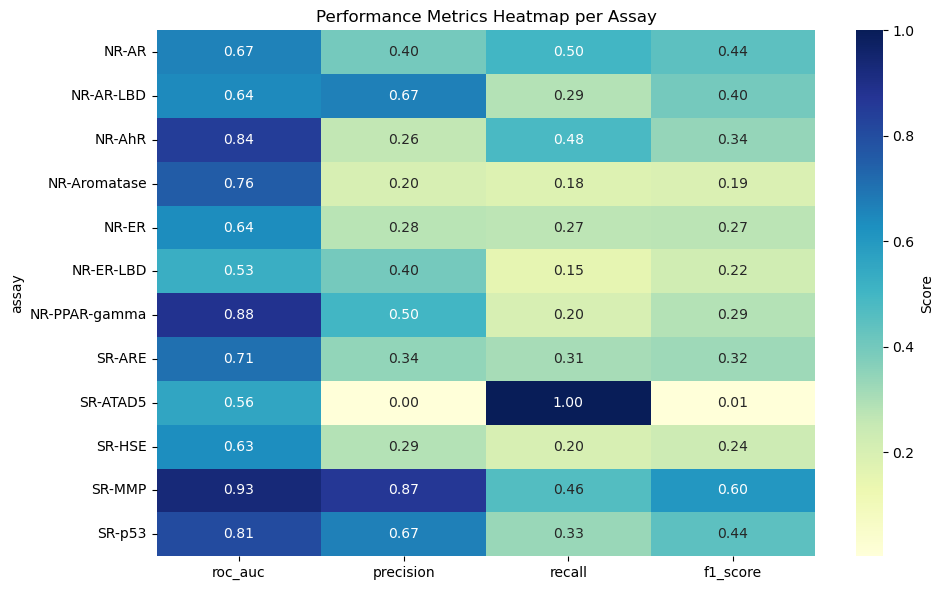

In [15]:
# Set assay as index for heatmap
metrics_heatmap = metrics_df.set_index("assay")[["roc_auc", "precision", "recall", "f1_score"]]

plt.figure(figsize=(10,6))
sns.heatmap(metrics_heatmap, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Score'})
plt.title("Performance Metrics Heatmap per Assay")
plt.tight_layout()
plt.savefig(RESULTS_FIGURES / "metrics_heatmap.png", dpi=300)
plt.show()


In [16]:
# Top & bottom assays by ROC-AUC
top_assays = metrics_df.sort_values("roc_auc", ascending=False).head(3)
bottom_assays = metrics_df.sort_values("roc_auc").head(3)

print("Top 3 assays (ROC-AUC):")
print(top_assays[["assay", "roc_auc", "f1_score"]])

print("\nBottom 3 assays (ROC-AUC):")
print(bottom_assays[["assay", "roc_auc", "f1_score"]])


Top 3 assays (ROC-AUC):
            assay   roc_auc  f1_score
10         SR-MMP  0.933652  0.604651
6   NR-PPAR-gamma  0.884918  0.285714
2          NR-AhR  0.844703  0.340909

Bottom 3 assays (ROC-AUC):
       assay   roc_auc  f1_score
5  NR-ER-LBD  0.528750  0.222222
8   SR-ATAD5  0.557096  0.006483
9     SR-HSE  0.632397  0.235294
